In [1]:
import pandas as pd

<h3> Reading the CSV file

In [2]:
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

<h3>Rename the Columns

In [5]:
data.rename(columns={'Annual Income (k$)':'Income','Spending Score (1-100)':'Score'},inplace=True)

In [6]:
data.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h3>Since CustomerID is a unique value of each customer drop it

In [7]:
data = data.drop('CustomerID',axis=1)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<h3> Based on Gender lets interpret if Gender is an important factor to group customers

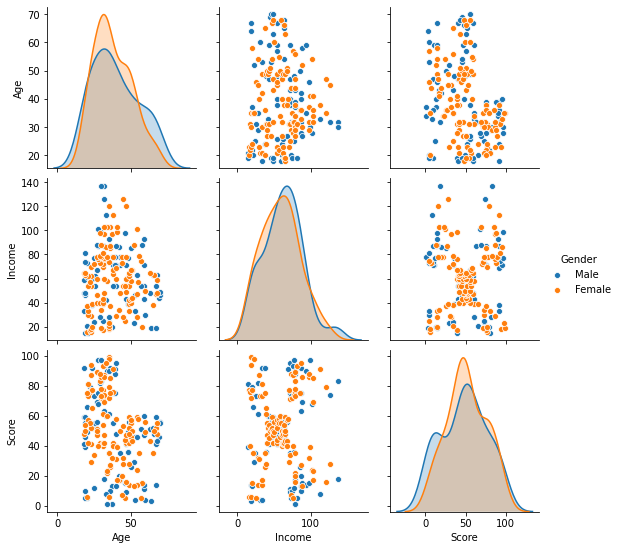

In [9]:
sns.pairplot(data,hue='Gender')

From the above pairplot we can determine Gender doesnt play any role in grouping the customers so better to drop the column

In [10]:
data = data.drop('Gender',axis=1)

In [11]:
data.head()

,Age,Income,Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


<h2>Choose right number of clusters using Elbow method

In [12]:
from sklearn.cluster import KMeans

clusters = []

for i in range(1,15):
    km = KMeans(n_clusters = i)
    km.fit(data)
    clusters.append(km.inertia_)
    

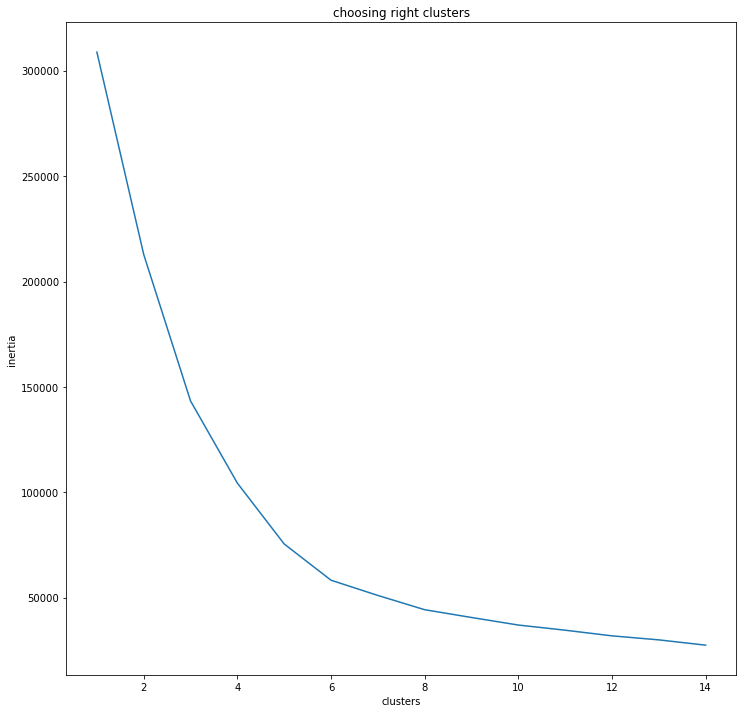

In [13]:
plt.figure(figsize=(12,12))
plt.plot(range(1,15), clusters)
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.title('choosing right clusters')
plt.show()

From the graph above we can determine either we can take 3 or 5 clusters

Inertia is the sum of squared error for each cluster

<h5> Using clusters = 3 lets group

In [14]:
km3 = KMeans(n_clusters = 3)
km3.fit(data)
data['Labels3'] = km3.labels_

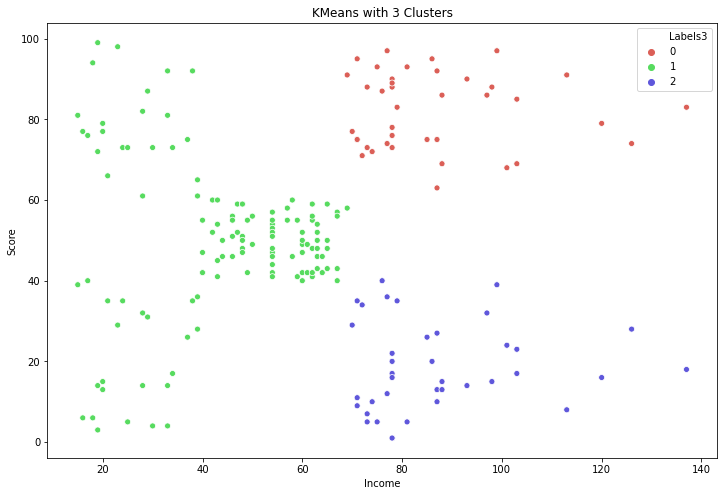

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels3'], palette=sns.color_palette('hls', 3))
plt.title('KMeans with 3 Clusters')
plt.show()

<h5> Using clusters = 5 lets Group

In [18]:
km5 = KMeans(n_clusters = 5)
km5.fit(data)
data['Labels5'] = km5.labels_

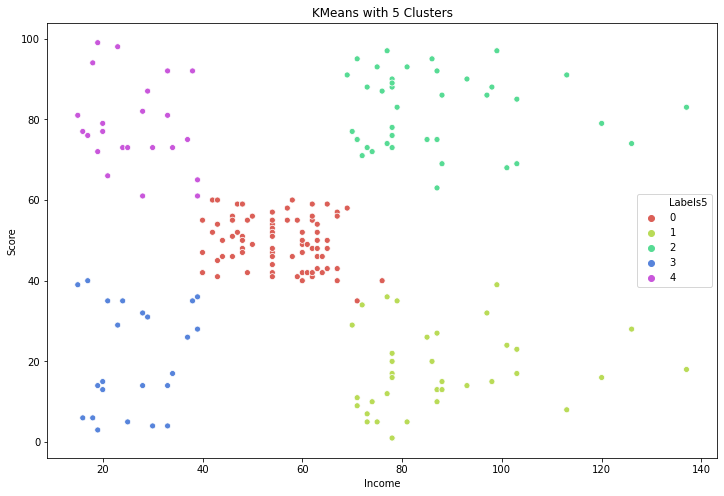

In [23]:
plt.figure(figsize=(12,8))
sns.scatterplot(data['Income'], data['Score'], hue=data['Labels5'],palette=sns.color_palette('hls', 5))
plt.title('KMeans with 5 Clusters')
plt.show()

So from above graph we can see customers are grouped in 5 clusters which is always better than grouping into 3 clusters

1) Cluster0 : Income is average and Score is also average
2) Cluster1 : Income is high but Score is low
3) Cluster2 : Income is high and Score is high
4) Cluster3 : Income is low and Score is also low
5) Cluster4 : Income is low but Score is high